- 패키지, 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='NanumGothic')

In [3]:
df = pd.read_csv('./data/SeoulBikeData.csv',encoding='cp1252')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


- 변수타입, 결측치, 통계량 확인

In [4]:
print(df.info(),'\n')
print('결측치 수: ', df.isna().sum(axis=0).sum(),'\n') #결측치 없음
df.describe() #min, max 확인해봤을 때 이상치는 없는 것으로 보임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


- 문자형 변수들의 분포 확인

In [5]:
print(df['Seasons'].value_counts())
print('\n',df['Holiday'].value_counts())
print('\n',df['Functioning Day'].value_counts()) #대여 수를 타깃으로 봤을 때 운영하지 않는 날은 제거하는 것이 좋아 보임

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

 No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

 Yes    8465
No      295
Name: Functioning Day, dtype: int64


- 혹시나 데이터에 문제가 있는지 확인하기 위해 운영하지 않는날의 대여 수가 모두 0인지 확인

In [6]:
print(df[df['Functioning Day']=='No']['Rented Bike Count'].value_counts())
df[df['Rented Bike Count'] == 0]['Functioning Day'].value_counts()

0    295
Name: Rented Bike Count, dtype: int64


No    295
Name: Functioning Day, dtype: int64

- 변수들의 상관계수 확인

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'correlation heatmap')

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


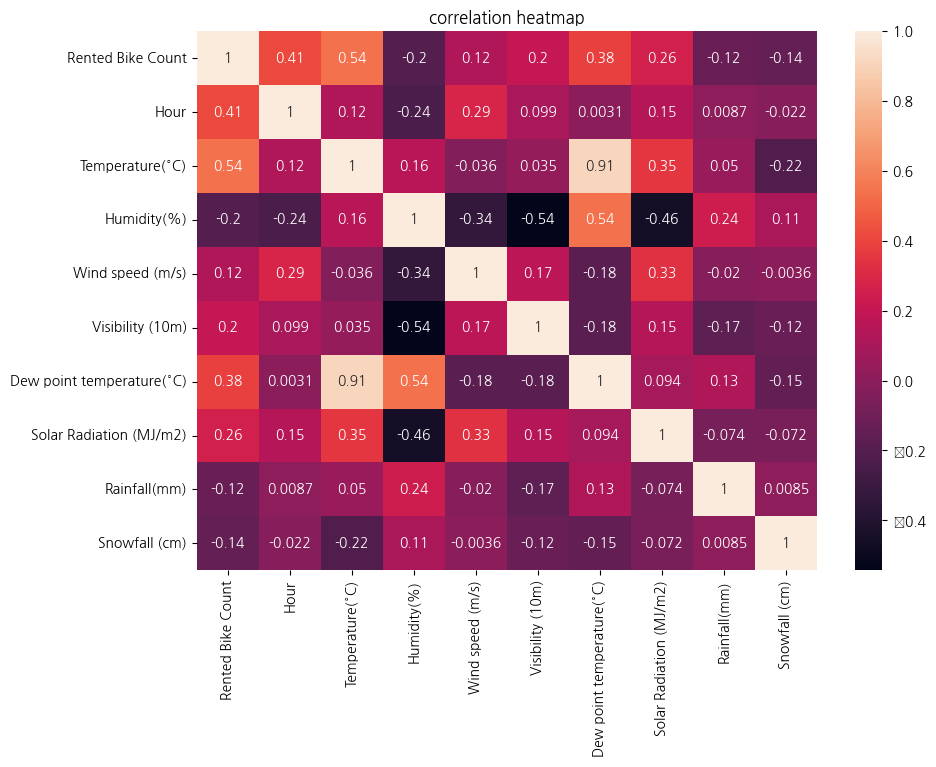

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot = True)
plt.title('correlation heatmap') #의외로 대여수와 상관계수가 높은 변수가 별로 없음

Text(0.5, 1.0, 'correlation heatmap(abs(corr)>0.45)')

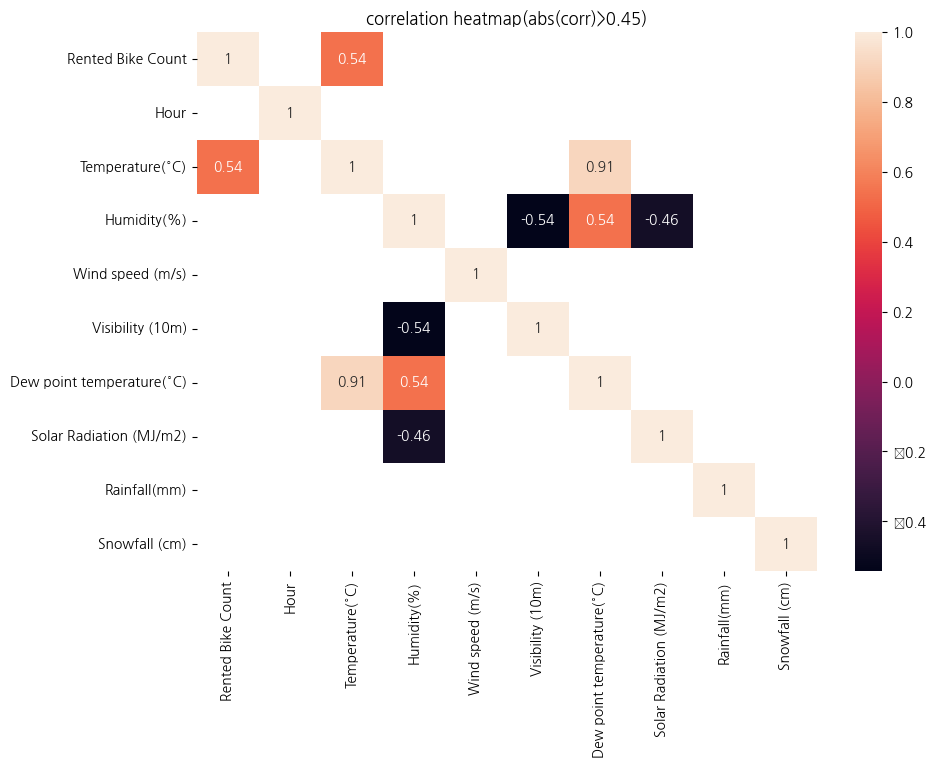

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr()[0.45<df.corr().abs()],annot = True)
plt.title('correlation heatmap(abs(corr)>0.45)')
#보다 쉽게 눈으로 확인하기 위해, 위 결과를 참고해 절대값 0.45이상인 애들만 추출해 다시한번 확인
#온도와 이슬점온도의 상관관계가 상당히 높은것으로 보아 전처리 단계에서 차원을 축소하는 등의 조치가 필요해보임.

- 계절별 변수들의 평균치 확인

In [9]:
df.groupby(['Seasons'])['Functioning Day'].value_counts() #운영하지 않는날이어서 대여수가 0인 것이 평균에 영향을 주는 것을 방지 하기 위해 조치가 필요해보임.

Seasons  Functioning Day
Autumn   Yes                1937
         No                  247
Spring   Yes                2160
         No                   48
Summer   Yes                2208
Winter   Yes                2160
Name: Functioning Day, dtype: int64

In [10]:
df_func = df[df['Functioning Day']=='Yes']
seasonal_avg = df_func.groupby(['Seasons']).mean() #운영하는날만 뽑아 계절별 평균계산
display(seasonal_avg)
#print(df.groupby(['Seasons']).mean()['Rented Bike Count']) #확실히 차이가 있음을 알 수 있음
seasonal_avg['Rented Bike Count'] # 여름이 가장 많고, 겨울엔 현저히 적은 것을 확인할 수 있음

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Seasons,,,,,,,,,,
Autumn,924.110480,11.530718,13.821683,59.044915,1.492101,1558.174497,5.150594,0.522783,0.117656,0.0635
Spring,746.254167,11.500000,13.021759,58.758333,1.857778,1240.911574,4.091389,0.680301,0.186944,0.0000
Summer,1034.073370,11.500000,26.582790,64.981431,1.609420,1501.745471,18.750136,0.761255,0.253487,0.0000
Winter,225.541204,11.500000,-2.540463,49.744907,1.922685,1445.987037,-12.416667,0.298181,0.032824,0.2475


Seasons
Autumn     924.110480
Spring     746.254167
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64

- 계절별, 휴일여부, 비(눈)여부에 따른 대여 수 분포확인

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


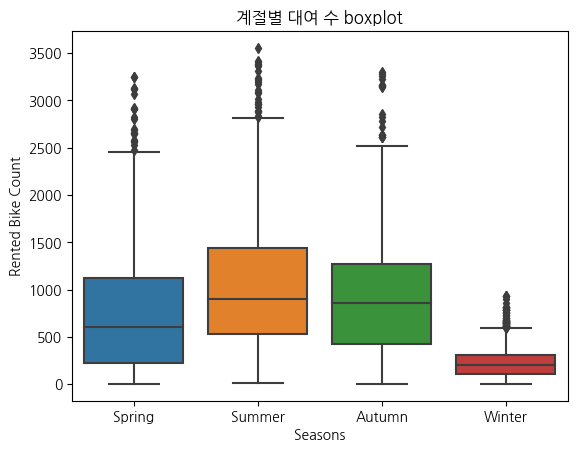

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


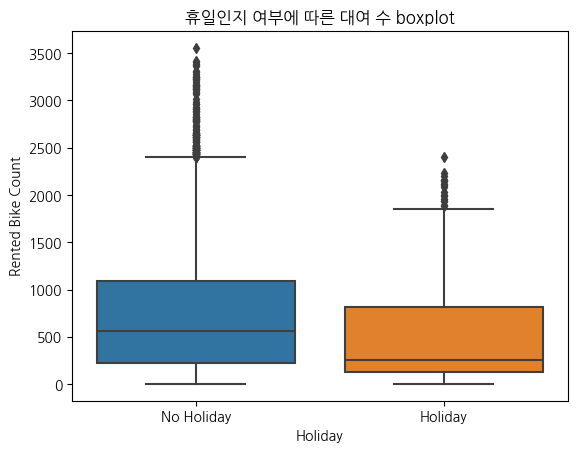

In [11]:
sns.boxplot(df_func.Seasons,df['Rented Bike Count'],order=["Spring", "Summer", "Autumn", "Winter"])
plt.title('계절별 대여 수 boxplot')
plt.show()
sns.boxplot(df_func.Holiday,df['Rented Bike Count'])
plt.title('휴일인지 여부에 따른 대여 수 boxplot')
plt.show()


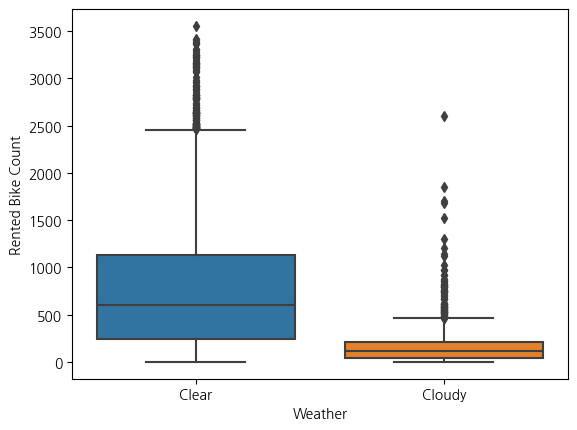

In [12]:
df['Weather'] = 'Clear'
df.loc[(df['Rainfall(mm)'] > 0) | (df['Snowfall (cm)'] > 0), 'Weather'] = 'Cloudy'
sns.boxplot(x="Weather", y="Rented Bike Count", data=df)
df.drop('Weather', axis=1, inplace=True)
plt.show()

- 시간, 요일에 따른 따릉이 대여 수

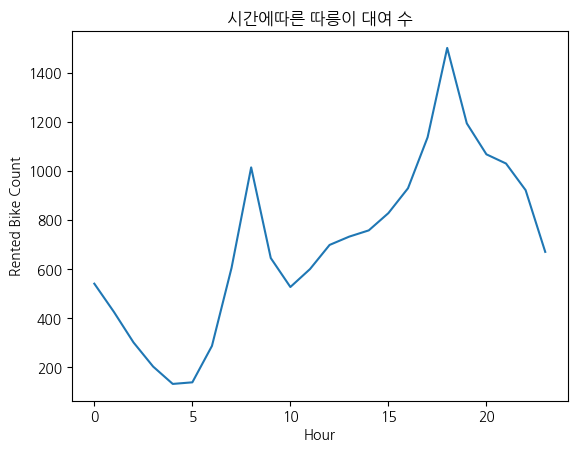

In [13]:
sns.lineplot(x='Hour', y='Rented Bike Count', data=df.groupby('Hour').mean().reset_index())
plt.title('시간에따른 따릉이 대여 수')
plt.show()

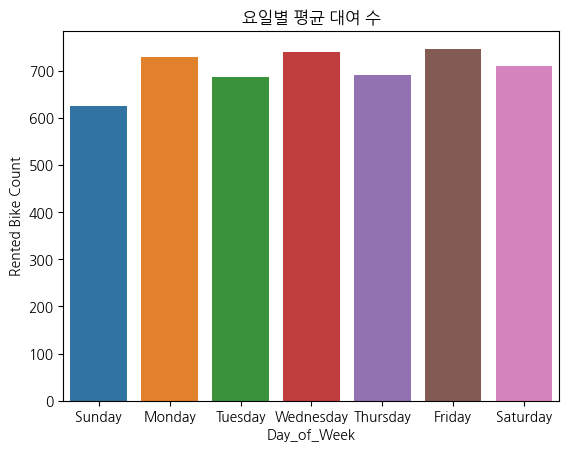

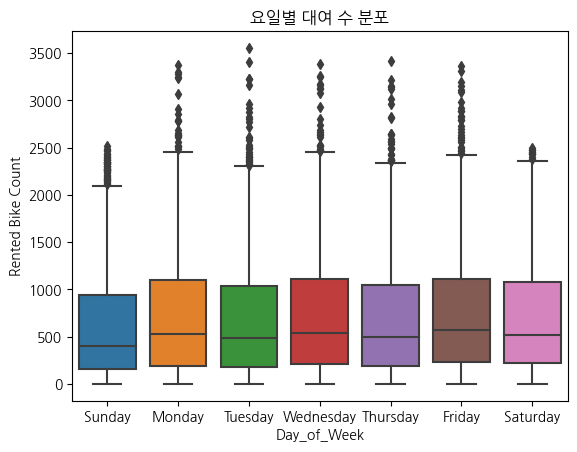

In [14]:
df['Day_of_Week'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.day_name()
sns.barplot(x='Day_of_Week', y='Rented Bike Count', data=df.groupby('Day_of_Week').mean().reset_index(), order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title('요일별 평균 대여 수')
plt.show()
sns.boxplot(x=df['Day_of_Week'], y='Rented Bike Count', data=df,order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title('요일별 대여 수 분포')
df.drop('Day_of_Week', axis=1, inplace=True) #일요일이 적다는 것만 빼면 큰 특징은 없어보임